# Import all the required libraries

---



In [3]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [4]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [5]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.347174,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05,23.661276,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06,23.663502,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07,23.995314,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08,24.917276,27.972500,28.037500,27.174999,27.307501,237458000


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

C:\Users\aashi\AppData\Local\Temp\ipykernel_14952\1616842492.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000


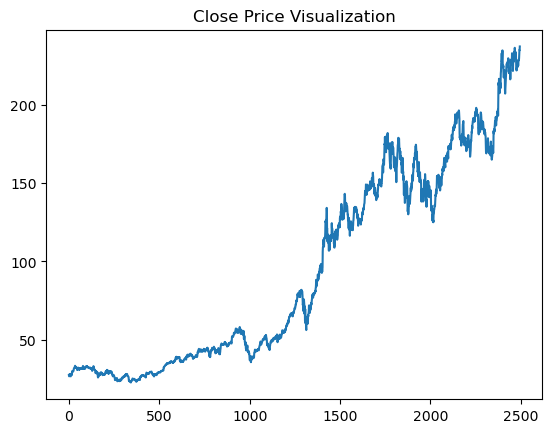

In [7]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [8]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,27.332500,27.860001,26.837500,27.847500,212818400
1,26.562500,27.162500,26.352501,27.072500,257142000
2,26.565001,26.857500,26.157499,26.635000,263188400
3,26.937500,27.049999,26.674999,26.799999,160423600
4,27.972500,28.037500,27.174999,27.307501,237458000
...,...,...,...,...,...
2490,229.869995,230.720001,228.059998,228.059998,38168300
2491,232.869995,233.250000,229.740005,231.460007,90152800
2492,235.059998,235.570007,233.330002,233.330002,45986200


# Plotting moving averages of 100 day

---



In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2490,225.4111
2491,225.4764
2492,225.5488
2493,225.6113


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

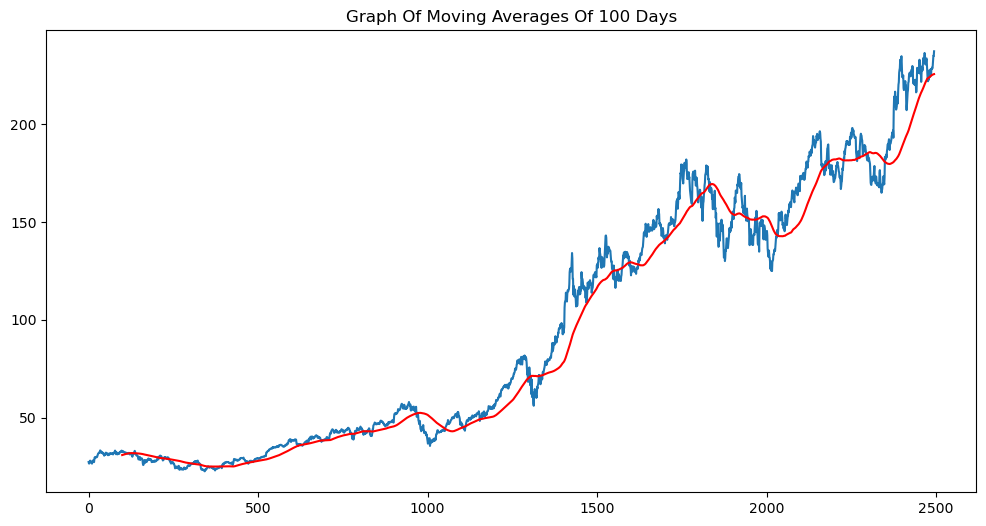

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2490,204.85145
2491,205.07155
2492,205.31110
2493,205.56055


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

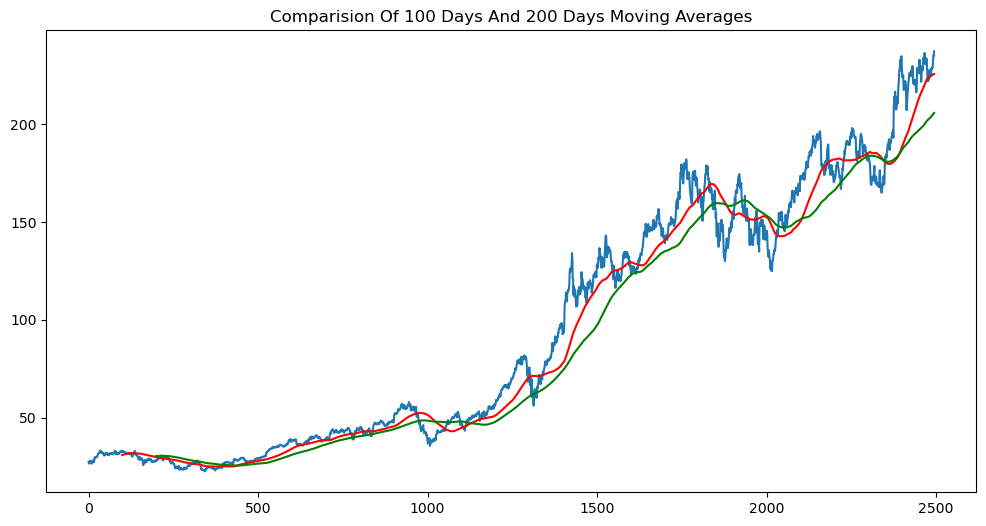

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [13]:
df.shape

(2495, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [14]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1746, 7)
(749, 7)


In [15]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.347174,27.332500,27.860001,26.837500,27.847500,212818400
1,2015-01-05,23.661276,26.562500,27.162500,26.352501,27.072500,257142000
2,2015-01-06,23.663502,26.565001,26.857500,26.157499,26.635000,263188400
3,2015-01-07,23.995314,26.937500,27.049999,26.674999,26.799999,160423600
4,2015-01-08,24.917276,27.972500,28.037500,27.174999,27.307501,237458000


In [16]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1746,2021-12-08,172.258255,175.080002,175.960007,170.699997,172.130005,116998900
1747,2021-12-09,171.746674,174.559998,176.750000,173.919998,174.910004,108923700
1748,2021-12-10,176.557846,179.449997,179.630005,174.690002,175.210007,115402700
1749,2021-12-13,172.907623,175.740005,182.130005,175.529999,181.119995,153237000
1750,2021-12-14,171.520386,174.330002,177.740005,172.210007,175.250000,139380400


# Using MinMax scaler for normalization of the dataset

---



In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [19]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0306222 ],
       [0.02729967],
       [0.02596379],
       ...,
       [0.94094781],
       [0.97218656],
       [1.        ]])

In [20]:
data_testing_array = scaler.fit_transform(test_close)
data_testing_array

array([[0.421926  ],
       [0.45112442],
       [0.45810668],
       [0.46572362],
       [0.43561851],
       [0.43652521],
       [0.42237942],
       [0.41276754],
       [0.39254633],
       [0.40759882],
       [0.43507432],
       [0.46336604],
       [0.47968816],
       [0.49292711],
       [0.48939066],
       [0.48893724],
       [0.48141093],
       [0.48549156],
       [0.49827709],
       [0.45765326],
       [0.43044978],
       [0.4249184 ],
       [0.39898441],
       [0.42301423],
       [0.45928554],
       [0.4318099 ],
       [0.42546245],
       [0.41022856],
       [0.37876319],
       [0.36280373],
       [0.3457563 ],
       [0.27684076],
       [0.29787819],
       [0.30513248],
       [0.3093036 ],
       [0.35029022],
       [0.41113526],
       [0.43652521],
       [0.44577443],
       [0.4348023 ],
       [0.4217446 ],
       [0.42419296],
       [0.42854548],
       [0.46001085],
       [0.42963371],
       [0.39780555],
       [0.3843852 ],
       [0.417

In [21]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [22]:
x_test = []
y_test = []
for i in range(100, data_testing_array.shape[0]):
   x_test.append(data_testing_array[i-100: i])
   y_test.append(data_testing_array[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test) 

In [23]:
x_train.shape

(1646, 100, 1)

# ML Model (LSTM)

---



In [24]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\aashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 192ms/step - MAE: 0.1702 - loss: 0.0631 - val_MAE: 0.1254 - val_loss: 0.0225
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - MAE: 0.0532 - loss: 0.0070 - val_MAE: 0.0810 - val_loss: 0.0094
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - MAE: 0.0435 - loss: 0.0048 - val_MAE: 0.0847 - val_loss: 0.0104
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - MAE: 0.0427 - loss: 0.0045 - val_MAE: 0.0830 - val_loss: 0.0098
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - MAE: 0.0442 - loss: 0.0051 - val_MAE: 0.0832 - val_loss: 0.0099
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - MAE: 0.0386 - loss: 0.0039 - val_MAE: 0.0850 - val_loss: 0.0103
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - MAE: 0.0398 - loss: 0.0041 - val_MAE: 0.0714 - val_loss: 0.0081
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - MAE: 0.0408 - loss: 0.0044 - val_MAE: 0.0697 - val_loss: 0.0075
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - 

In [28]:
model.save('keras_model.h5')

In [29]:

test_close.shape
test_close

array([[170.69999695],
       [173.91999817],
       [174.69000244],
       [175.52999878],
       [172.21000671],
       [172.30999756],
       [170.75      ],
       [169.69000244],
       [167.46000671],
       [169.11999512],
       [172.1499939 ],
       [175.27000427],
       [177.07000732],
       [178.52999878],
       [178.13999939],
       [178.08999634],
       [177.25999451],
       [177.71000671],
       [179.11999512],
       [174.63999939],
       [171.63999939],
       [171.02999878],
       [168.16999817],
       [170.82000732],
       [174.82000732],
       [171.78999329],
       [171.08999634],
       [169.41000366],
       [165.94000244],
       [164.17999268],
       [162.30000305],
       [154.69999695],
       [157.02000427],
       [157.82000732],
       [158.27999878],
       [162.80000305],
       [169.50999451],
       [172.30999756],
       [173.33000183],
       [172.11999512],
       [170.67999268],
       [170.94999695],
       [171.42999268],
       [174

In [30]:
past_100_days = pd.DataFrame(train_close[-100:])

In [31]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [32]:
final_df = pd.concat([past_100_days,test_df], ignore_index = True)

In [33]:
final_df.head()

,0
0,141.669998
1,142.960007
2,144.630005
3,145.809998
4,146.919998


In [34]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.15868698],
       [0.17038456],
       [0.18552781],
       [0.19622778],
       [0.20629307],
       [0.21336597],
       [0.1938702 ],
       [0.16657595],
       [0.18507439],
       [0.1808125 ],
       [0.19114982],
       [0.190515  ],
       [0.20048967],
       [0.1994922 ],
       [0.19459564],
       [0.19359817],
       [0.19160324],
       [0.1936888 ],
       [0.1964998 ],
       [0.2185347 ],
       [0.20221258],
       [0.22597024],
       [0.19931081],
       [0.18434895],
       [0.20502358],
       [0.21508888],
       [0.22651429],
       [0.21427281],
       [0.21164306],
       [0.205477  ],
       [0.22161772],
       [0.24591944],
       [0.25544068],
       [0.25598473],
       [0.26224155],
       [0.27402976],
       [0.27031191],
       [0.27003989],
       [0.2224338 ],
       [0.22288722],
       [0.20620245],
       [0.20130574],
       [0.20901345],
       [0.19577436],
       [0.1550599 ],
       [0.16875227],
       [0.17709466],
       [0.194

In [35]:
input_data.shape

(849, 1)

# Testing the model

---



In [36]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(749, 100, 1)
(749,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [38]:
# Making predictions

y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [39]:
y_pred.shape

(749, 1)

In [40]:
y_test

array([0.421926  , 0.45112442, 0.45810668, 0.46572362, 0.43561851,
       0.43652521, 0.42237942, 0.41276754, 0.39254633, 0.40759882,
       0.43507432, 0.46336604, 0.47968816, 0.49292711, 0.48939066,
       0.48893724, 0.48141093, 0.48549156, 0.49827709, 0.45765326,
       0.43044978, 0.4249184 , 0.39898441, 0.42301423, 0.45928554,
       0.4318099 , 0.42546245, 0.41022856, 0.37876319, 0.36280373,
       0.3457563 , 0.27684076, 0.29787819, 0.30513248, 0.3093036 ,
       0.35029022, 0.41113526, 0.43652521, 0.44577443, 0.4348023 ,
       0.4217446 , 0.42419296, 0.42854548, 0.46001085, 0.42963371,
       0.39780555, 0.3843852 , 0.41784551, 0.41603197, 0.40170478,
       0.38103015, 0.34439605, 0.32263332, 0.25235765, 0.33278924,
       0.34693503, 0.34276391, 0.35165034, 0.37522674, 0.34394277,
       0.3161951 , 0.28681543, 0.31955029, 0.28844757, 0.27502722,
       0.23512884, 0.23766782, 0.27466457, 0.30340957, 0.32272395,
       0.35219438, 0.36942334, 0.3942691 , 0.41748285, 0.44051

In [41]:
y_pred

array([[0.32622778],
       [0.33523893],
       [0.34579408],
       [0.35836652],
       [0.37304282],
       [0.3889838 ],
       [0.40497822],
       [0.41960496],
       [0.43149483],
       [0.4395849 ],
       [0.443685  ],
       [0.44466972],
       [0.44431686],
       [0.44432628],
       [0.44596067],
       [0.44975823],
       [0.45565975],
       [0.46304506],
       [0.47114646],
       [0.47943532],
       [0.4867403 ],
       [0.49174106],
       [0.49345595],
       [0.49119216],
       [0.48539203],
       [0.47773856],
       [0.46944934],
       [0.4613363 ],
       [0.45367736],
       [0.44605666],
       [0.43789446],
       [0.42863402],
       [0.41720033],
       [0.40355158],
       [0.3884864 ],
       [0.37310392],
       [0.35893226],
       [0.3476388 ],
       [0.34075335],
       [0.339402  ],
       [0.34355837],
       [0.35217935],
       [0.36386836],
       [0.3772885 ],
       [0.39162153],
       [0.40578282],
       [0.41813362],
       [0.427

In [42]:
scaler.scale_

array([0.00906783])

In [43]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

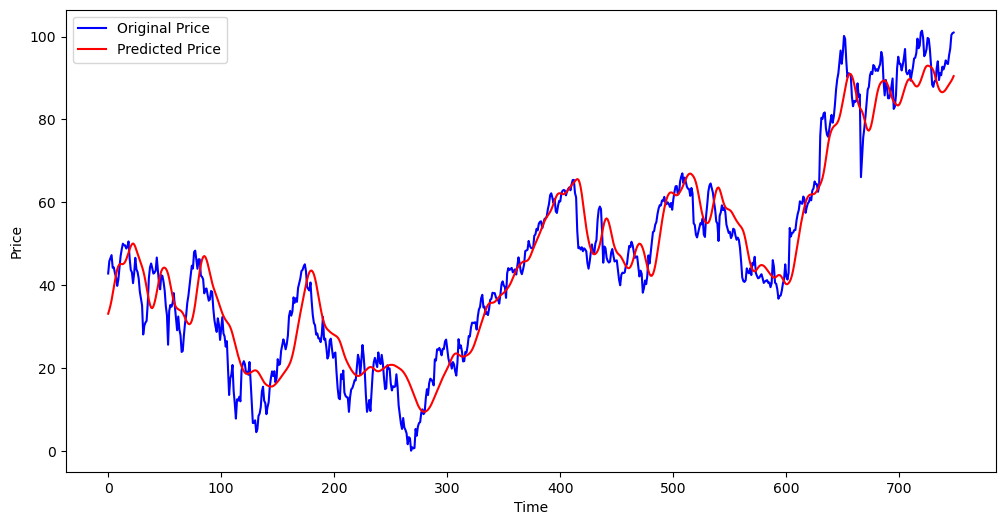

In [44]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [45]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.264425768455635
